Prepare Training <br>
This script will sort the images and their corresponding annotations into the folders train and test. The annotation is expected to be provided in xml-format (Pascal VOC) and will be converted to COCO json format.

In [1]:
import os
import random

In [2]:
#get all filenames in data
files_ = os.listdir("data")
files = []
for i in files_:
    if "jpg" in i:
        files.append(i)
print(files[:5])

['ACT_Folsomia_candida_b1_024.jpg', 'Deuterosminthurus_CS367_batch1_04.jpg', 'Sminthurides_aquaticus_CS_027_FR_03_06.jpg', 'Sminthurides_aquaticus_CS_027_FR_03_04.jpg', 'SCH_6212.jpg']


In [3]:
#create folders train and test
!mkdir train
!mkdir test
!mkdir not_used

In [4]:
#initalize random, with the seed we can guarantee that the results are reproducible
random.seed(42)
#set up two directories, counting the specimen for training and test set
#to balance the datasets, we expect ~500 specimen in the training set and 50 in the test set
#we do not allow to have more than 550 specimen in training set and 60 in test set

trainimg_threshold = 550
testimg_threshold = 60

species_train = {
    "folsomia" : 0,
    "ceratophysella" : 0,
    "sminthurides" : 0,
    "sinella" : 0,
    "deuterosminthurus" : 0,
    "megalothorax" : 0,
    "sphaeridia" : 0,
    "desoria" : 0,
    "species01" : 0,
    "pseudosinella" : 0
}
species_test = {
    "folsomia" : 0,
    "ceratophysella" : 0,
    "sminthurides" : 0,
    "sinella" : 0,
    "deuterosminthurus" : 0,
    "megalothorax" : 0,
    "sphaeridia" : 0,
    "desoria" : 0,
    "species01" : 0,
    "pseudosinella" : 0
}

#shuffle the order of the array
random.shuffle(files)

for i in range(len(files)):
    #for every image we count the occurence of species
    species_img = {
        "folsomia" : 0,
        "ceratophysella" : 0,
        "sminthurides" : 0,
        "sinella" : 0,
        "deuterosminthurus" : 0,
        "megalothorax" : 0,
        "sphaeridia" : 0,
        "desoria" : 0,
        "species01" : 0,
        "pseudosinella" : 0
    }
      
    #get the filename of the image
    image = "data/" + files[i]
    #get the filename of the corresponding annotation file
    annotation_file = "data/" + files[i][:-3] + "xml"
    
    #open the annotation file
    f = open(annotation_file)
    for j in f:
        #get all specimen by name
        if "<name>" in j:
            #increase count by one
            species_img[j[8:-8]] += 1
    f.close()
    
    #draw a random integer between 1 and 100
    coin_flip = random.randint(1,100)
    #if it is below 10, image will go to the test set
    if coin_flip <= 10:
        tmp_count = []
        for key in species_img:
            tmp = 0
            #get the count for each species and evaluate if adding this image would exceed the threshold
            tmp = species_img[key] + species_test[key]
            tmp_count.append(tmp)
        thresh_exceeded = False
        for k in range(len(tmp_count)):
            #if threshold is exceeded, move image to the folder not_used
            if tmp_count[k] > testimg_threshold:
                image_to = "not_used/" + files[k]
                annotation_file_to = "not_used/" + files[k][:-3] + "xml"
                !cp $image $image_to
                !cp $annotation_file $annotation_file_to
                thresh_exceeded = True
                break
            #else move to folder train
        if thresh_exceeded == False:
            image_to = "test/" + files[i]
            annotation_file_to = "test/" + files[i][:-3] + "xml"
            !cp $image $image_to
            !cp $annotation_file $annotation_file_to
            #and adjust the species count dictionary
            for key in species_img:
                species_test[key] += species_img[key]
    else:
        tmp_count = []
        for key in species_img:
            tmp = 0
            #get the count for each species and evaluate if adding this image would exceed the threshold
            tmp = species_img[key] + species_train[key]
            tmp_count.append(tmp)
        thresh_exceeded = False
        for k in range(len(tmp_count)):
            #if threshold is exceeded, move image to the folder not_used
            if tmp_count[k] > trainimg_threshold:
                image_to = "not_used/" + files[k]
                annotation_file_to = "not_used/" + files[k][:-3] + "xml"
                !cp $image $image_to
                !cp $annotation_file $annotation_file_to
                thresh_exceeded = True
                break
            #else move to folder train
        if thresh_exceeded == False:
            image_to = "train/" + files[i]
            annotation_file_to = "train/" + files[i][:-3] + "xml"
            !cp $image $image_to
            !cp $annotation_file $annotation_file_to
            #and adjust the species count dictionary
            for key in species_img:
                species_train[key] += species_img[key]
print(species_test)
print(species_train)

{'folsomia': 55, 'ceratophysella': 9, 'sminthurides': 52, 'sinella': 17, 'deuterosminthurus': 58, 'megalothorax': 23, 'sphaeridia': 52, 'desoria': 36, 'species01': 58, 'pseudosinella': 25}
{'folsomia': 550, 'ceratophysella': 55, 'sminthurides': 550, 'sinella': 189, 'deuterosminthurus': 550, 'megalothorax': 336, 'sphaeridia': 549, 'desoria': 445, 'species01': 403, 'pseudosinella': 452}


In [2]:
species_test = {'folsomia': 55, 'ceratophysella': 9, 'sminthurides': 52, 'sinella': 17, 'deuterosminthurus': 58, 'megalothorax': 23, 'sphaeridia': 52, 'desoria': 36, 'species01': 58, 'pseudosinella': 25}
species_train = {'folsomia': 550, 'ceratophysella': 55, 'sminthurides': 550, 'sinella': 189, 'deuterosminthurus': 550, 'megalothorax': 336, 'sphaeridia': 549, 'desoria': 445, 'species01': 403, 'pseudosinella': 452}

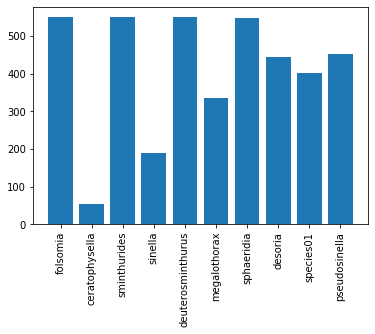

In [4]:
import matplotlib.pyplot as plt
keys_train = species_train.keys()
values_train = species_train.values()
plt.xticks(rotation=90)
plt.bar(keys_train,values_train)
plt.savefig("train_count.jpg")

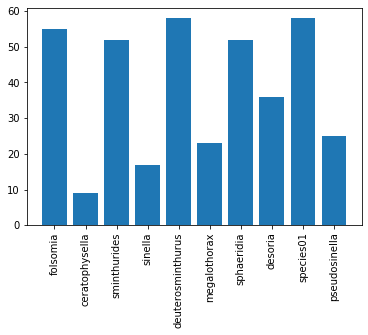

In [5]:
keys_test = species_test.keys()
values_test = species_test.values()
plt.xticks(rotation=90)
plt.bar(keys_test,values_test)
plt.savefig("test_count.jpg")

In [7]:

#the script I use to convert the xml format to JSON requires the file to be in a numbered fashion.
def rename_to_numbers(counter):
    #save the old name with the corresponding new name
    !touch naming_scheme.txt
    f = open("naming_scheme.txt", "w")
    data_names = []
    for i in os.listdir('.'):
        if ".jpg" == i[-4:]:
            if counter % 10 == 0:
                print(counter)
            xml_file = i[:-3] + "xml"
            picture = i
            picture_to = str(counter) + ".jpg"
            xml_file_to = str(counter) + ".xml"
            !mv $picture $picture_to
            !mv $xml_file $xml_file_to
            entry = picture + "\t" + picture_to + "\n"
            entry_xml = xml_file + "\t" + xml_file_to + "\n"
            data_names.append(entry)
            data_names.append(entry_xml)
            counter += 1
    f.writelines(data_names)
    f.close()
    return counter
%cd train
my_counter = 0
my_counter = rename_to_numbers(my_counter)
%cd ..
%cd test
my_counter = rename_to_numbers(my_counter)
%cd ..

/home/stephan/Desktop/collembola_ai/train
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
/home/stephan/Desktop/collembola_ai
/home/stephan/Desktop/collembola_ai/test
530
540
550
560
570
/home/stephan/Desktop/collembola_ai


In [21]:
!python voc2coco.py train train/train.json

Number of xml files: 523
Traceback (most recent call last):
  File "voc2coco.py", line 44, in get_filename_as_int
    return int(filename)
ValueError: invalid literal for int() with base 10: 'ACT_Folsomia_candida_b3_03'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "voc2coco.py", line 153, in <module>
    convert(xml_files, args.json_file)
  File "voc2coco.py", line 87, in convert
    image_id = get_filename_as_int(filename)
  File "voc2coco.py", line 46, in get_filename_as_int
    raise ValueError("Filename %s is supposed to be an integer." % (filename))
ValueError: Filename ACT_Folsomia_candida_b3_03 is supposed to be an integer.


In [19]:
!ls train

0.jpg	 168.jpg  235.jpg  302.jpg  370.jpg  438.jpg  505.jpg
0.xml	 168.xml  235.xml  302.xml  370.xml  438.xml  505.xml
100.jpg  169.jpg  236.jpg  303.jpg  371.jpg  439.jpg  506.jpg
100.xml  169.xml  236.xml  303.xml  371.xml  439.xml  506.xml
101.jpg  16.jpg   237.jpg  304.jpg  372.jpg  43.jpg   507.jpg
101.xml  16.xml   237.xml  304.xml  372.xml  43.xml   507.xml
102.jpg  170.jpg  238.jpg  305.jpg  373.jpg  440.jpg  508.jpg
102.xml  170.xml  238.xml  305.xml  373.xml  440.xml  508.xml
103.jpg  171.jpg  239.jpg  306.jpg  374.jpg  441.jpg  509.jpg
103.xml  171.xml  239.xml  306.xml  374.xml  441.xml  509.xml
104.jpg  172.jpg  23.jpg   307.jpg  375.jpg  442.jpg  50.jpg
104.xml  172.xml  23.xml   307.xml  375.xml  442.xml  50.xml
105.jpg  173.jpg  240.jpg  308.jpg  376.jpg  443.jpg  510.jpg
105.xml  173.xml  240.xml  308.xml  376.xml  443.xml  510.xml
106.jpg  174.jpg  241.jpg  309.jpg  377.jpg  444.jpg  511.jpg
106.xml  174.xml  241.xml  309.xml  377.xml  444.xml  511.xml
107.jpg  175.j